![](./img/dl_banner.jpg)

# Keras多层感知器
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

## 1.引入工具库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD
%matplotlib inline
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

Using TensorFlow backend.


## 2.数据准备
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

### 2.1 数据读取

In [2]:
from keras.utils import np_utils

In [3]:
# 直接使用本方法加载mnist数据集需要科学上网，可使用下个cell的方法进行加载

# from keras.datasets import mnist  

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 加载mnist数据集
f = np.load('/data/Deep_learning/mnist.npz')
X_train, y_train = f['x_train'], f['y_train']
X_test, y_test = f['x_test'], f['y_test']
f.close()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# 做一下幅度缩放
X_train /= 255
X_test /= 255

# 把数字1，4，7等转成one-hot的形式
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### 2.2 切分训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

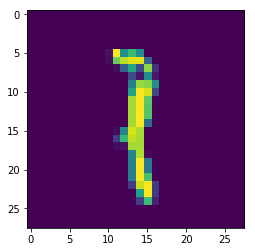

In [8]:
plt.imshow(X_train[0].reshape(28, 28))

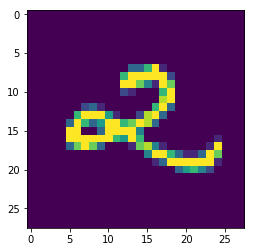

In [9]:
plt.imshow(X_val[0].reshape(28, 28))

## 3.模型构建
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

## 4.模型训练
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [11]:
# 可以查看模型结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 训练
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 2s 54us/step - loss: 2.2479 - acc: 0.1785 - val_loss: 2.1125 - val_acc: 0.4089
Epoch 2/20
45000/45000 [==============================] - 1s 33us/step - loss: 2.0343 - acc: 0.4058 - val_loss: 1.8911 - val_acc: 0.6420
Epoch 3/20
45000/45000 [==============================] - 2s 33us/step - loss: 1.8218 - acc: 0.5757 - val_loss: 1.6608 - val_acc: 0.7146
Epoch 4/20
45000/45000 [==============================] - 1s 33us/step - loss: 1.6045 - acc: 0.6581 - val_loss: 1.4320 - val_acc: 0.7547
Epoch 5/20
45000/45000 [==============================] - 2s 34us/step - loss: 1.3922 - acc: 0.7067 - val_loss: 1.2253 - val_acc: 0.7866
Epoch 6/20
45000/45000 [==============================] - 1s 33us/step - loss: 1.2111 - acc: 0.7374 - val_loss: 1.0552 - val_acc: 0.8039
Epoch 7/20
45000/45000 [==============================] - 2s 35us/step - loss: 1.0667 - acc: 0.7588 - val_loss: 0.9243 - val_acc

## 5.打印训练信息
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

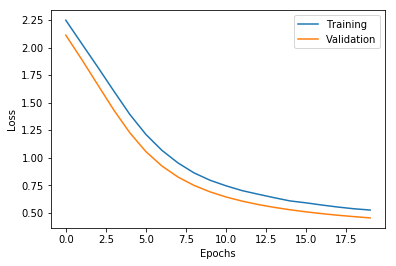

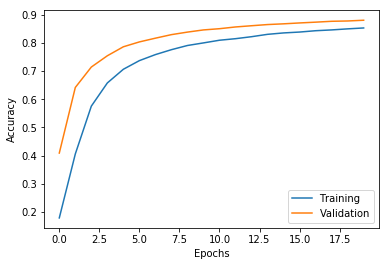

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

## 附：遍历与设置model.layers
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [14]:
print('模型输入张量: ', model.input, end='\n\n')
print('神经网络的层次信息:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('本层的设定')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('模型输出张量: ', model.output)

模型输入张量:  Tensor("dense_1_input:0", shape=(?, 784), dtype=float32)

神经网络的层次信息:

dense_1 True
本层的设定
{'units': 512, 'dtype': 'float32', 'name': 'dense_1', 'activity_regularizer': None, 'kernel_initializer': {'config': {'seed': None, 'scale': 1.0, 'distribution': 'uniform', 'mode': 'fan_avg'}, 'class_name': 'VarianceScaling'}, 'bias_regularizer': None, 'trainable': True, 'kernel_regularizer': None, 'activation': 'relu', 'batch_input_shape': (None, 784), 'use_bias': True, 'kernel_constraint': None, 'bias_constraint': None, 'bias_initializer': {'config': {}, 'class_name': 'Zeros'}}
----------------------------------------
dropout_1 True
本层的设定
{'seed': None, 'noise_shape': None, 'rate': 0.2, 'name': 'dropout_1', 'trainable': True}
----------------------------------------
dense_2 True
本层的设定
{'units': 512, 'kernel_initializer': {'config': {'seed': None, 'scale': 1.0, 'distribution': 'uniform', 'mode': 'fan_avg'}, 'class_name': 'VarianceScaling'}, 'activity_regularizer': None, 'name': 'dense_2',

## 附：抽取中间层次与可视化
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [15]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [16]:
# 抽取特征
hidden_features = model_truncated.predict(X_train)

In [17]:
from sklearn.manifold import TSNE
# 降维到2维，方便可视化
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000])

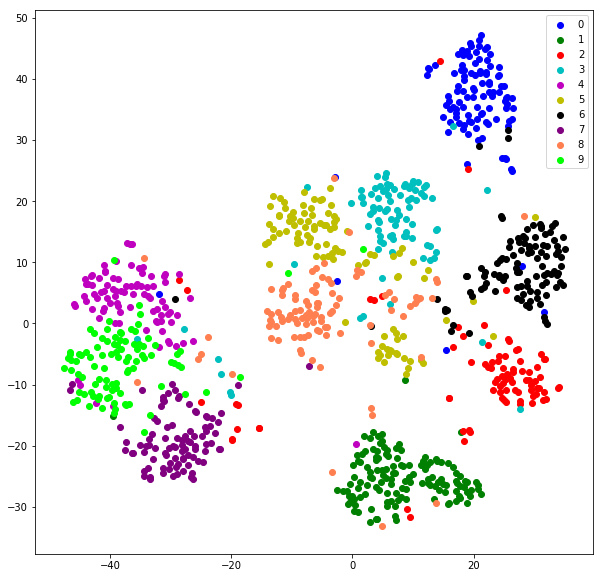

In [18]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = np.argmax(Y_train, axis=1)
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
nb_classes = 10
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

### 版权归 © 稀牛学院 所有 保留所有权利
![](./img/xiniu_neteasy.png)